<a href="https://colab.research.google.com/github/Haripriyakolakalan/Building-CNN/blob/main/CNN_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

perform a cnn model for mnist fashion dataset . build the network with training data and test the model with train set.
epoch =50
batch_size=16*3=48

In [ ]:
pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=38cd82127b850f2afc910982313f71b43d4b079301b6f0bc397cb45cdbeab604
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [ ]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 22.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,Convolution2D,MaxPooling2D
from keras.utils import np_utils
from keras.datasets import fashion_mnist

In [ ]:
from ann_visualizer.visualize import ann_viz
import visualkeras

In [ ]:
(Xtrain,Ytrain),(Xtest,Ytest)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


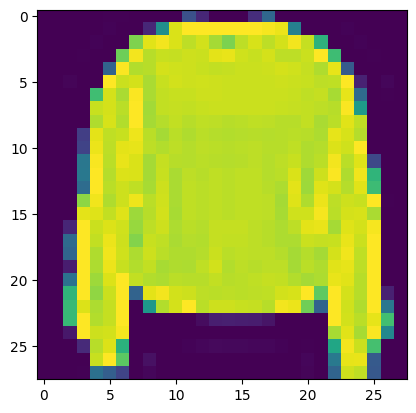

In [ ]:
plt.imshow(Xtrain[7])

In [ ]:
print(Ytrain[0])

9


In [ ]:
Xtrain.shape

(60000, 28, 28)

In [ ]:
Xtrain=Xtrain.reshape(Xtrain.shape[0],28,28,1)
Xtest=Xtest.reshape(Xtest.shape[0],28,28,1)

In [ ]:
Xtrain.shape

(60000, 28, 28, 1)

In [ ]:
Xtrain.dtype

dtype('uint8')

In [ ]:
Xtrain=Xtrain.astype('float32')
Xtest=Xtest.astype('float32')

In [ ]:
Xtrain/=255
Xtest/=255

In [ ]:
Ytrain=np_utils.to_categorical(Ytrain,10)

In [ ]:
Ytest=np_utils.to_categorical(Ytest,10)

In [ ]:
print(Ytrain[8])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
from keras.layers.serialization import convolutional
model=Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 64)                5

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
ann_viz(model,view=True,filename='CNN',title="CNN-FASHION-MNIST")

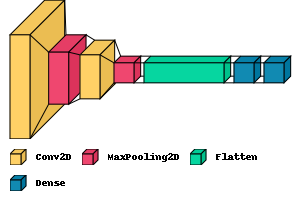

In [ ]:
visualkeras.layered_view(model,legend=True)

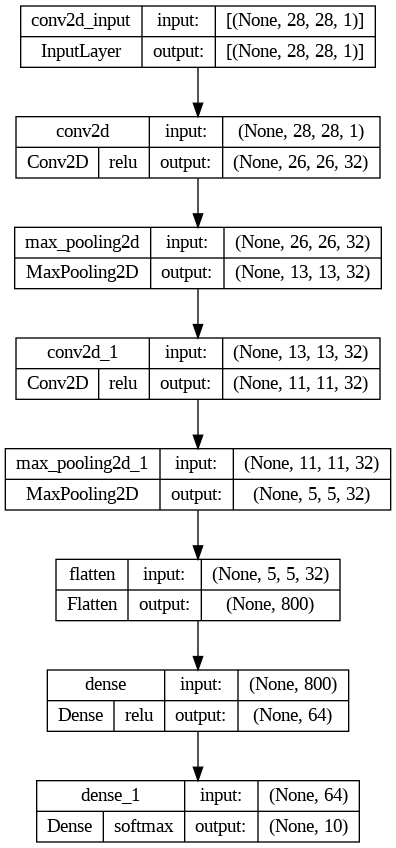

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model,show_shapes=True,show_dtype=False,to_file='CNN-FASHION-MNIST.png',show_layer_names=True,expand_nested=True,dpi=96,layer_range=None,show_layer_activations=True)

In [ ]:
model.fit(Xtrain,Ytrain,epochs=50,batch_size=48)

Epoch 1/50
1250/1250 [==============================] - 26s 6ms/step - loss: 0.5271 - accuracy: 0.8073
Epoch 2/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3518 - accuracy: 0.8730
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3073 - accuracy: 0.8890
Epoch 4/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2749 - accuracy: 0.9000
Epoch 5/50
1250/1250 [==============================] - 4s 4ms/step - loss: 0.2525 - accuracy: 0.9069
Epoch 6/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2346 - accuracy: 0.9129
Epoch 7/50
1250/1250 [==============================] - 4s 4ms/step - loss: 0.2184 - accuracy: 0.9199
Epoch 8/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2053 - accuracy: 0.9238
Epoch 9/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1938 - accuracy: 0.9281
Epoch 10/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.18

In [ ]:
pred=model.predict(Xtest[np.newaxis,1])

1/1 [==============================] - 0s 141ms/step


In [ ]:
prediction=pred.argmax(axis=1)

In [ ]:
pred

array([[1.0000000e+00, 1.0644339e-22, 3.1307103e-08, 1.9550176e-14,
        7.7658825e-22, 2.9308200e-24, 9.1183400e-10, 1.8566667e-21,
        6.6722225e-15, 6.3038693e-30]], dtype=float32)

In [ ]:
prediction

array([0])

In [ ]:
print(labels[prediction[0]])

t-shirt/top


In [ ]:
img=(Xtest[1]*255).reshape((28,28)).astype('uint8')

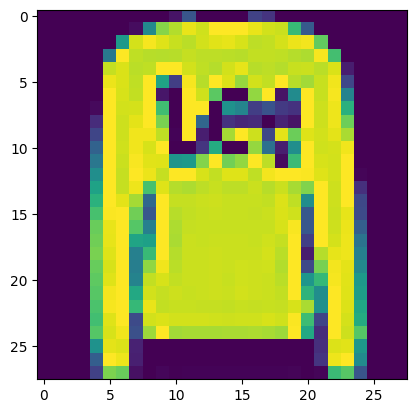

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
labels=['t-shirt/top','trouser','pullover','dress','coat','sandal','sneaker','bag','ankle boot']

1/1 [==============================] - 0s 114ms/step
Product is: dress


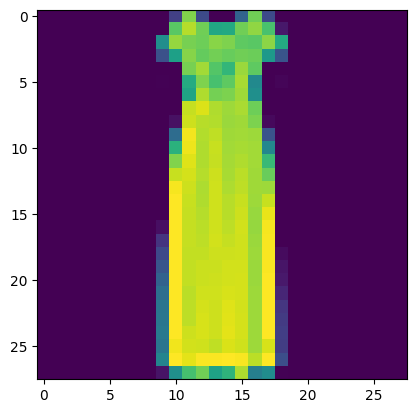

1/1 [==============================] - 0s 28ms/step
Product is: dress


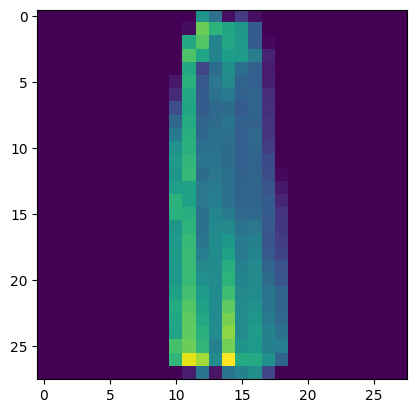

1/1 [==============================] - 0s 26ms/step
Product is: t-shirt/top


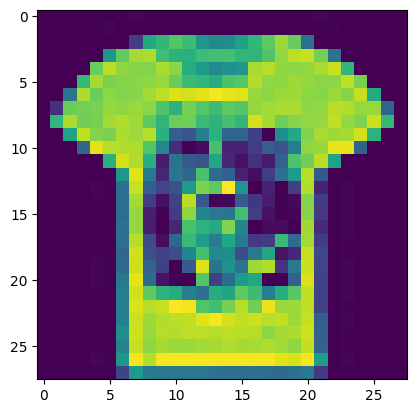

1/1 [==============================] - 0s 28ms/step
Product is: bag


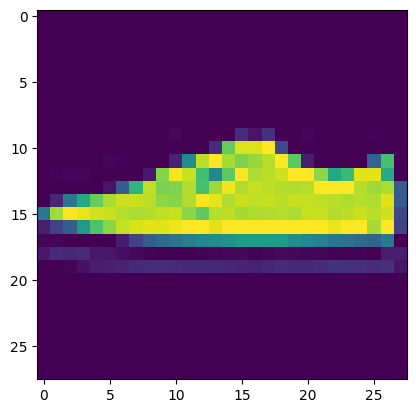

In [ ]:
for i in np.random.choice(np.arange(0,len(Ytest)),size=(4,)):
  pred=model.predict(Xtest[np.newaxis,i])
  prediction=pred.argmax(axis=1)
  img=(Xtest[i]*255).reshape((28,28)).astype('uint8')
  print('Product is:',labels[prediction[0]])
  plt.imshow(img)
  plt.show()